# Desafio 4

Neste desafio, vamos praticar um pouco sobre testes de hipóteses. Utilizaremos o _data set_ [2016 Olympics in Rio de Janeiro](https://www.kaggle.com/rio2016/olympic-games/), que contém dados sobre os atletas das Olimpíadas de 2016 no Rio de Janeiro.

Esse _data set_ conta com informações gerais sobre 11538 atletas como nome, nacionalidade, altura, peso e esporte praticado. Estaremos especialmente interessados nas variáveis numéricas altura (`height`) e peso (`weight`). As análises feitas aqui são parte de uma Análise Exploratória de Dados (EDA).

> Obs.: Por favor, não modifique o nome das funções de resposta.

## _Setup_ geral

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as sct
import statsmodels.api as sm
import seaborn as sns
from math import log

In [2]:
df = pd.read_csv("athletes.csv")

In [3]:
def get_sample(df, col_name, n=100, seed=42):
    """Get a sample from a column of a dataframe.
    
    It drops any numpy.nan entries before sampling. The sampling
    is performed without replacement.
    
    Example of numpydoc for those who haven't seen yet.
    
    Parameters
    ----------
    df : pandas.DataFrame
        Source dataframe.
    col_name : str
        Name of the column to be sampled.
    n : int
        Sample size. Default is 100.
    seed : int
        Random seed. Default is 42.
    
    Returns
    -------
    pandas.Series
        Sample of size n from dataframe's column.
    """
    np.random.seed(seed)
    
    random_idx = np.random.choice(df[col_name].dropna().index, size=n, replace=False)
    
    return df.loc[random_idx, col_name]

## Inicia sua análise a partir daqui

In [4]:
df.set_index('id', drop=True, inplace=True)
df.head()

,name,nationality,sex,dob,height,weight,sport,gold,silver,bronze
id,,,,,,,,,,
736041664,A Jesus Garcia,ESP,male,10/17/69,1.72,64.0,athletics,0,0,0
532037425,A Lam Shin,KOR,female,9/23/86,1.68,56.0,fencing,0,0,0
435962603,Aaron Brown,CAN,male,5/27/92,1.98,79.0,athletics,0,0,1
521041435,Aaron Cook,MDA,male,1/2/91,1.83,80.0,taekwondo,0,0,0
33922579,Aaron Gate,NZL,male,11/26/90,1.81,71.0,cycling,0,0,0


In [5]:
df.describe()

,height,weight,gold,silver,bronze
count,11208.000000,10879.000000,11538.000000,11538.000000,11538.000000
mean,1.766282,72.068205,0.057722,0.056769,0.061016
std,0.112719,16.177334,0.255910,0.239147,0.243320
min,1.210000,31.000000,0.000000,0.000000,0.000000
25%,1.690000,60.000000,0.000000,0.000000,0.000000
50%,1.760000,70.000000,0.000000,0.000000,0.000000
75%,1.840000,81.000000,0.000000,0.000000,0.000000
max,2.210000,170.000000,5.000000,2.000000,2.000000


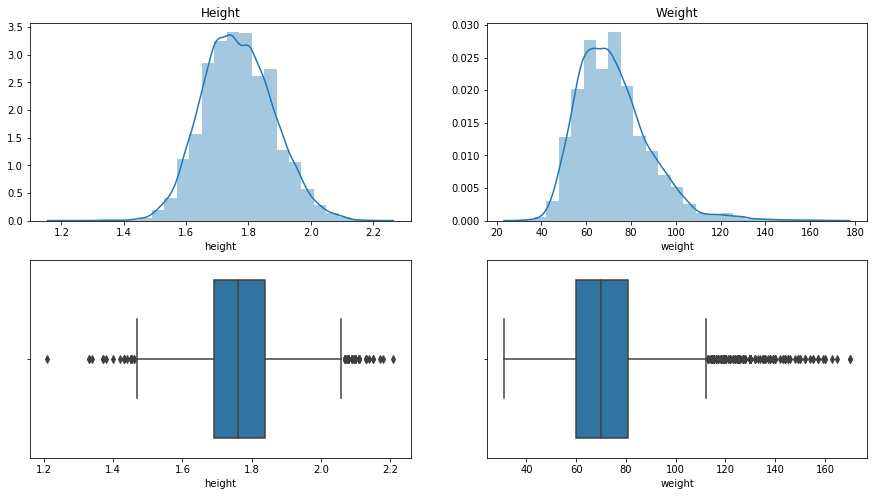

In [6]:
fig, axs = plt.subplots(ncols=2, nrows=2, figsize=(15,8))
sns.distplot(df.height, bins=25, ax=axs[0,0]).set_title('Height')
sns.distplot(df.weight, bins=25, ax=axs[0,1]).set_title('Weight')
sns.boxplot(df.height, ax=axs[1,0])
sns.boxplot(df.weight, ax=axs[1,1]);

## Questão 1

Considerando uma amostra de tamanho 3000 da coluna `height` obtida com a função `get_sample()`, execute o teste de normalidade de Shapiro-Wilk com a função `scipy.stats.shapiro()`. Podemos afirmar que as alturas são normalmente distribuídas com base nesse teste (ao nível de significância de 5%)? Responda com um boolean (`True` ou `False`).

In [7]:
sample_height = get_sample(df, "height", n=3000)

def q1():
    shapiro = sct.shapiro(sample_height)
    return shapiro[1] > 0.05
q1()

False

__Para refletir__:

* Plote o histograma dessa variável (com, por exemplo, `bins=25`). A forma do gráfico e o resultado do teste são condizentes? Por que?
* Plote o qq-plot para essa variável e a analise.
* Existe algum nível de significância razoável que nos dê outro resultado no teste? (Não faça isso na prática. Isso é chamado _p-value hacking_, e não é legal).

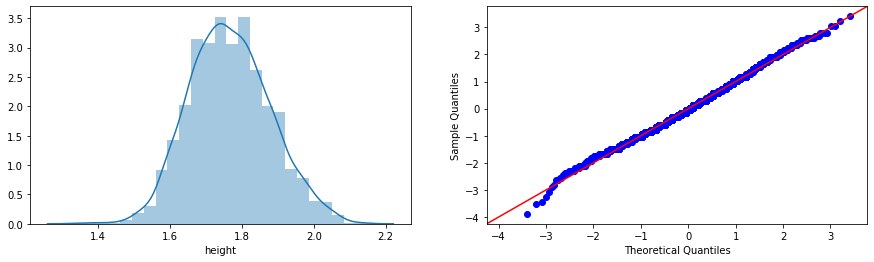

In [8]:
fig, axs = plt.subplots(ncols=2, figsize=(15,4))
sns.distplot(sample_height, bins=25, ax=axs[0])
sm.qqplot(sample_height, fit=True, line="45", ax=axs[1]);

Graficamente nossos dados se apresentam a uma distribuição normal, mas precisamos verificar a curtose e assimetria no teste de Jarque Bera para confirmar, uma vez que o teste de Shapiro apresenta p-value menor que 0.05.

## Questão 2

Repita o mesmo procedimento acima, mas agora utilizando o teste de normalidade de Jarque-Bera através da função `scipy.stats.jarque_bera()`. Agora podemos afirmar que as alturas são normalmente distribuídas (ao nível de significância de 5%)? Responda com um boolean (`True` ou `False`).

In [9]:
def q2():
    jarque = sct.jarque_bera(sample_height)
    kurtosis = jarque[0]
    skewness = jarque[1]
    return kurtosis < 4 and skewness < 1
q2()

False

__Para refletir__:

* Esse resultado faz sentido?

Uma distribuição normal possui curtose igual a 3 e assimetria igual a 0, portanto para verificar se uma distribuição é aproximadamente normal, consideramos curtose menor que 4 e assimetria menor que 1.
Com isso é possível perceber que nossos dados não são normais, uma vez que a curtose se dá em 13.03 e a assimetria em 0.0015.

## Questão 3

Considerando agora uma amostra de tamanho 3000 da coluna `weight` obtida com a função `get_sample()`. Faça o teste de normalidade de D'Agostino-Pearson utilizando a função `scipy.stats.normaltest()`. Podemos afirmar que os pesos vêm de uma distribuição normal ao nível de significância de 5%? Responda com um boolean (`True` ou `False`).

In [10]:
sample_weight = get_sample(df, "weight", n=3000)

def q3():
    pearson = sct.normaltest(sample_weight)
    return pearson.pvalue >= 0.05
q3()

False

__Para refletir__:

* Plote o histograma dessa variável (com, por exemplo, `bins=25`). A forma do gráfico e o resultado do teste são condizentes? Por que?
* Um _box plot_ também poderia ajudar a entender a resposta.

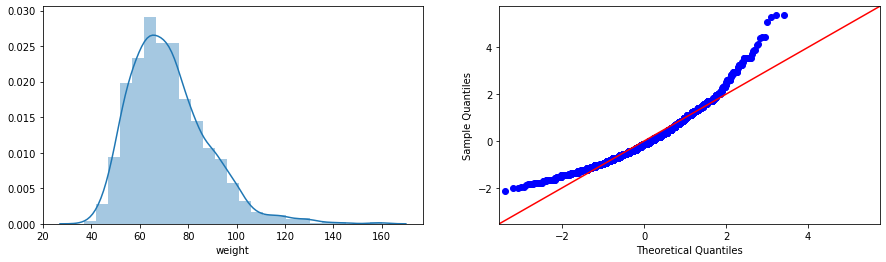

In [11]:
fig, axs = plt.subplots(ncols=2, figsize=(15,4))
sns.distplot(sample_weight, bins=25, ax=axs[0])
sm.qqplot(sample_weight, fit=True, line="45", ax=axs[1]);

Conforme [Miot (2017)](https://www.scielo.br/pdf/jvb/v16n2/1677-5449-jvb-16-2-88.pdf), o teste de normalidade de Pearson é indicado para amostras mais numerosas (n > 100), apresentando um resultado aproximado ao teste de Shapiro. Neste caso, o teste de Person apresenta p-value menor que 0.05, mostrando uma distribuição não normal. O que é visível graficamente.

## Questão 4

Realize uma transformação logarítmica em na amostra de `weight` da questão 3 e repita o mesmo procedimento. Podemos afirmar a normalidade da variável transformada ao nível de significância de 5%? Responda com um boolean (`True` ou `False`).

In [12]:
sample_weight_log = sample_weight.apply(lambda x: log(x, 10))

def q4():
    pearson = sct.normaltest(sample_weight_log)
    return pearson.pvalue >= 0.05
q4()

False

__Para refletir__:

* Plote o histograma dessa variável (com, por exemplo, `bins=25`). A forma do gráfico e o resultado do teste são condizentes? Por que?
* Você esperava um resultado diferente agora?

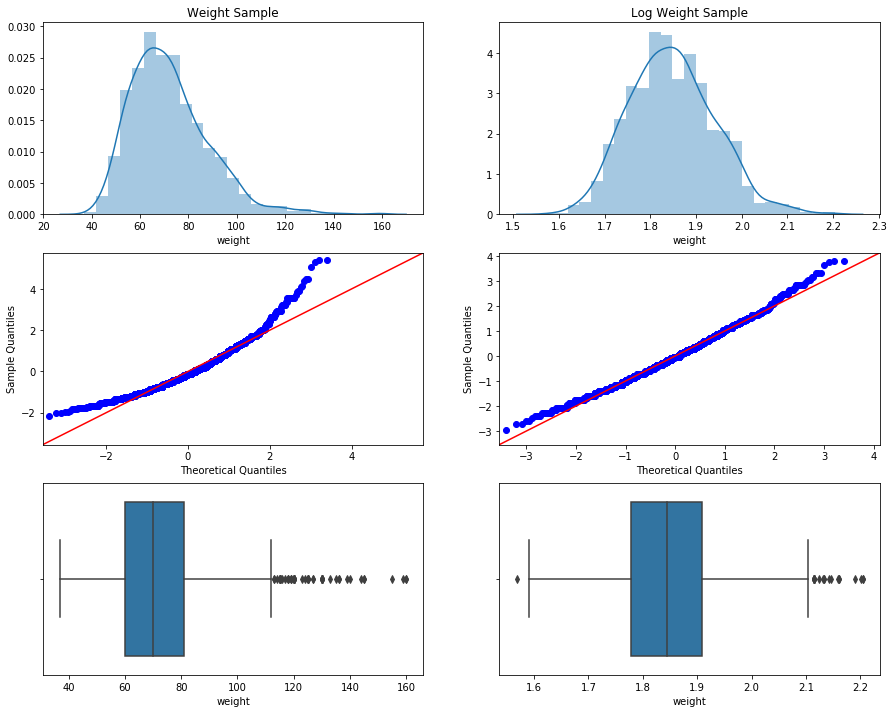

In [13]:
fig, axs = plt.subplots(ncols=2, nrows=3, figsize=(15,12))
sns.distplot(sample_weight, bins=25, ax=axs[0,0]).set_title('Weight Sample')
sns.distplot(sample_weight_log, bins=25, ax=axs[0,1]).set_title('Log Weight Sample')
sm.qqplot(sample_weight, fit=True, line="45", ax=axs[1,0])
sm.qqplot(sample_weight_log, fit=True, line="45", ax=axs[1,1])
sns.boxplot(sample_weight, ax=axs[2,0])
sns.boxplot(sample_weight_log, ax=axs[2,1]);

Conforme [Winter e Lôbo (2014)](http://rstudio-pubs-static.s3.amazonaws.com/289147_99e32d5403f942339c3fe05414ac62fd.html), a transformação logaritmica pode ser usada para reduzir o impacto dos outliers na distribuição, reduzindo o viés e aumentando a correlação dos dados. Como mostra o gráfico acima. Vale ressaltar que neste caso, o viés era tão acentuado que mesmo após a tranformação os dados não se aproximaram de uma distribuição normal.

> __Para as questão 5 6 e 7 a seguir considere todos testes efetuados ao nível de significância de 5%__.

## Questão 5

Obtenha todos atletas brasileiros, norte-americanos e canadenses em `DataFrame`s chamados `bra`, `usa` e `can`,respectivamente. Realize um teste de hipóteses para comparação das médias das alturas (`height`) para amostras independentes e variâncias diferentes com a função `scipy.stats.ttest_ind()` entre `bra` e `usa`. Podemos afirmar que as médias são estatisticamente iguais? Responda com um boolean (`True` ou `False`).

In [14]:
bra, usa, can = [df[df.nationality.str.lower().str.contains(country)] for country in ['bra', 'usa', 'can']]

def q5():
    ttest_bra_usa = sct.ttest_ind(bra.height, usa.height, equal_var=False, nan_policy='omit')
    return ttest_bra_usa.pvalue > 0.05
q5()

False

[Lopes, Leinioski e Ceccon (2015)](http://www.leg.ufpr.br/lib/exe/fetch.php/disciplinas:ce001:bioestatistica_testes_t_para_comparacao_de_medias_de_dois.pdf) diz que quando não se conhece as médias e desvio padrão da população, o teste t de student pode ser utilizado para comparar duas amostras independentes verificando se há associação entre elas. No exemplo acima percebemos que as amostras não são estatísticamente associadas, uma vez que o p-value resultante é menor que 0.05.

## Questão 6

Repita o procedimento da questão 5, mas agora entre as alturas de `bra` e `can`. Podemos afimar agora que as médias são estatisticamente iguais? Reponda com um boolean (`True` ou `False`).

In [16]:
def q6():
    ttest_bra_can = sct.ttest_ind(bra.height, can.height, equal_var=False, nan_policy='omit')
    return ttest_bra_can.pvalue > 0.05
q6()

True

## Questão 7

Repita o procedimento da questão 6, mas agora entre as alturas de `usa` e `can`. Qual o valor do p-valor retornado? Responda como um único escalar arredondado para oito casas decimais.

In [17]:
def q7():
    ttest_usa_can = sct.ttest_ind(usa.height, can.height, equal_var=False, nan_policy='omit')
    return round(ttest_usa_can.pvalue, 8)
q7()

0.00046601

__Para refletir__:

* O resultado faz sentido?
* Você consegue interpretar esse p-valor?
* Você consegue chegar a esse valor de p-valor a partir da variável de estatística?

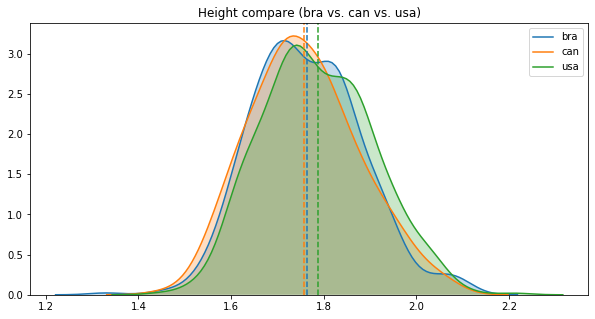

In [20]:
fig, ax = plt.subplots(figsize=(10,5))
sns.kdeplot(bra.height, shade=True, ax=ax)
sns.kdeplot(can.height, shade=True, ax=ax)
sns.kdeplot(usa.height, shade=True, ax=ax)
ax.axvline(bra.height.mean(), color='C0', linestyle='--')
ax.axvline(can.height.mean(), color='C1', linestyle='--')
ax.axvline(usa.height.mean(), color='C2', linestyle='--')
ax.set_title('Height compare (bra vs. can vs. usa)')
plt.legend(['bra', 'can', 'usa']);

Plotando o gráfico acima as coisas ficam mais claras. Por mais que as distribuições se pareçam, quando olhamos para o objeto de estudo – a média, vemos que jogadores com a nacionalidade americana a possuem significativamente esta maior, fazendo com que não seja igual estatísticamente.